# **Computer Vision & Internet of Things (GRIP September 22)**
# **Name : Kaung Khant Ko Ko**
# **Task 2 : Color Identification in Images**

# **Import Libraries**

In [ ]:
import matplotlib
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

%matplotlib inline

# **Color Identification**

## **RGB to Hex Color Code Conversion**

In [ ]:
def RGB2HEX(color : list) -> str:
  color = list(map(lambda value : value / 255.0, color))
  hex = matplotlib.colors.to_hex(color)
  return hex

## **Loading Image**

In [ ]:
def get_image(path : str) -> np.ndarray:
  image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
  return image

## **Getting RGB Values**

In [ ]:
def get_rgb(image : np.ndarray, num_colors : int, show_chart : bool = False) -> np.ndarray:
  height, width, _ = image.shape
  image = cv2.resize(image, (width // 2, height // 2))

  pixel_values = image.reshape((-1, 3))
  
  km = KMeans(n_clusters = num_colors)
  labels = km.fit_predict(pixel_values)

  centers = km.cluster_centers_
  hex_values = [RGB2HEX(center) for center in centers]
  rgb_values = list(map(lambda value : value / 255.0, centers))

  if show_chart:
    _, axarr = plt.subplots(1, 2, squeeze=False, figsize=(10, 5))
    axarr[0, 0].imshow(image)
    axarr[0, 1].pie(Counter(labels).values(), labels = hex_values, colors = rgb_values)
    plt.show()
  return centers

## **Identifying Colors from the Image**

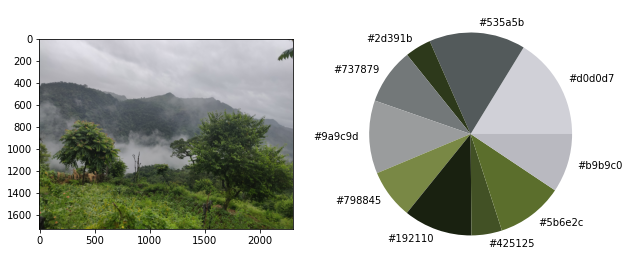

The Colors :  [[208.23536821 207.89302892 215.41218301]
 [ 82.62843733  89.62519116  90.51556976]
 [ 45.21969801  57.14536956  27.27739569]
 [115.00054697 120.21721834 120.8610494 ]
 [154.42534054 156.43333837 156.943834  ]
 [121.42754541 136.09416249  69.27895285]
 [ 24.58859174  32.7437514   15.92037789]
 [ 66.17480872  81.36861938  36.56832443]
 [ 91.2769671  109.73381561  43.75868138]
 [184.62527838 185.04635176 192.01730562]]


In [ ]:
image = get_image("/content/images/sample_image.jpeg")
num_colors = 10

colors = get_rgb(image, num_colors, True)
print("The Colors : ", colors)

## **Identifying Colors from the Images**

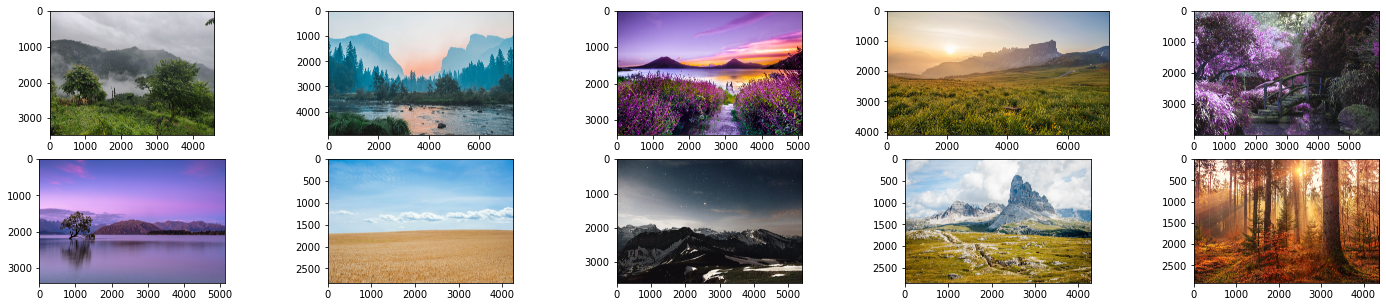

In [ ]:
IMAGES_DIRECTORY = "images"
images = []

for file in os.listdir(IMAGES_DIRECTORY):
  if not file.startswith("."):
    images.append(get_image(os.path.join(IMAGES_DIRECTORY,file)))

_, axarr = plt.subplots(2, 5, squeeze=False, figsize=(25, 5))
for i in range(len(images)):
  if i < 5:
    axarr[0, i].imshow(images[i])
  else:
    axarr[1, i - 5].imshow(images[i])
plt.show()

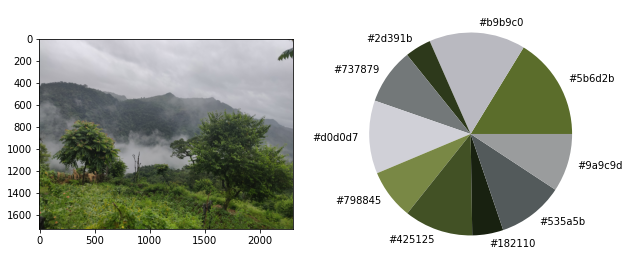

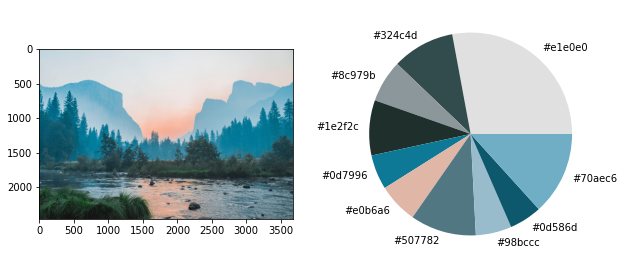

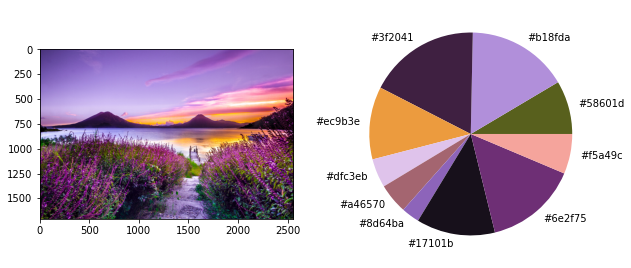

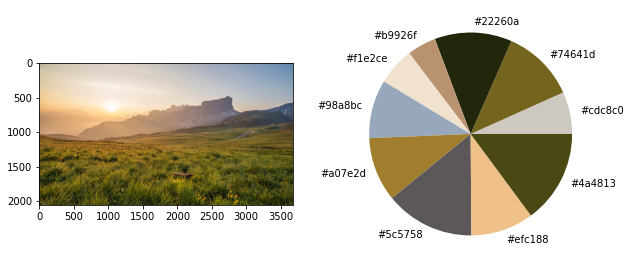

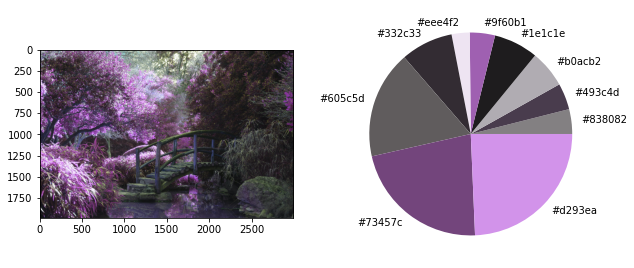

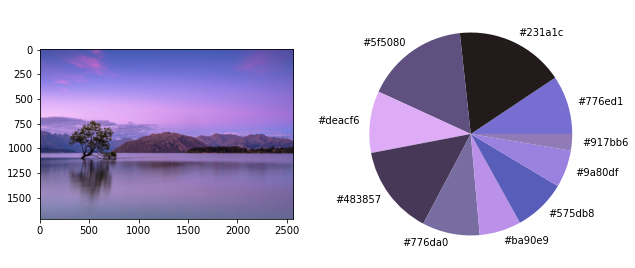

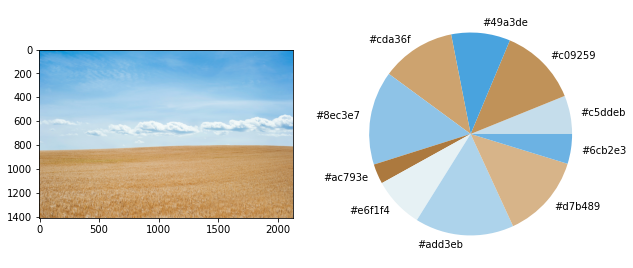

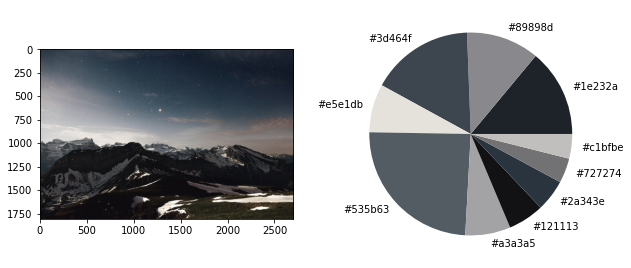

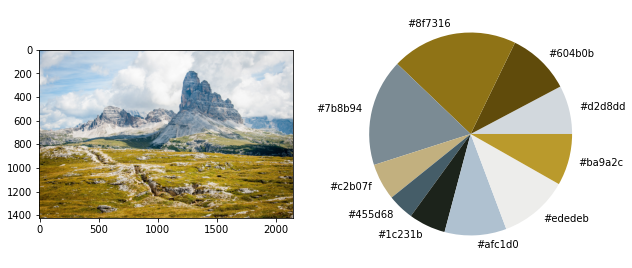

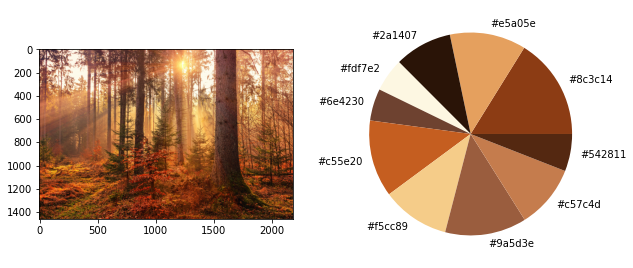

In [ ]:
num_colors = 10

for image in images:
  _ = get_rgb(image, num_colors, True)